 #IMPORT LIBRAIRIES 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
df=pd.read_csv("/Users/almas/Documents/Data_analystics/Data/WeatherDataM.csv")
# df.dropna(inplace=True)
df.head()


,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83


In [3]:
print(df.info)
df.shape

<bound method DataFrame.info of     Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity
0          9.472222            14.1197               1015.13      0.89
1          9.355556            14.2646               1015.63      0.86
2          9.377778             3.9284               1015.94      0.89
3          8.288889            14.1036               1016.41      0.83
4          8.755556            11.0446               1016.51      0.83
5          9.222222            13.9587               1016.66      0.85
6          7.733333            12.3648               1016.72      0.95
7          8.772222            14.1519               1016.84      0.89
8         10.822222            11.3183               1017.37      0.82
9         13.772222            12.5258               1017.22      0.72
10        16.016667            17.5651               1017.42      0.67
11        17.144444            19.7869               1017.74      0.54
12        17.800000            21.9443       

(50, 4)

In [4]:
print(df.isna().sum().sum())

0


In [5]:
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool


In [6]:
print(df.drop_duplicates(inplace=True))

None


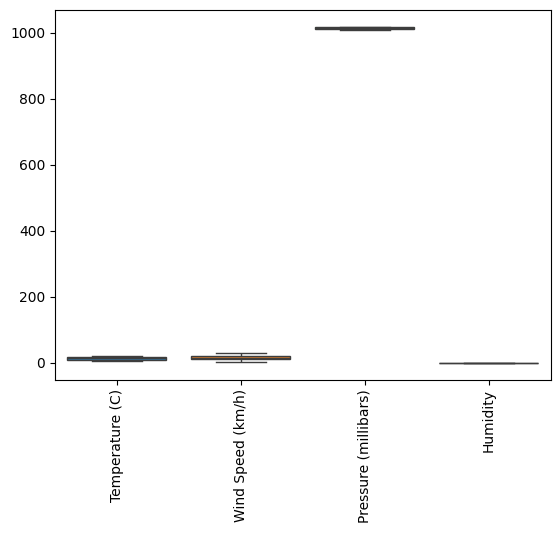

In [7]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

                      Temperature (C)  Wind Speed (km/h)  \
Temperature (C)              1.000000           0.710133   
Wind Speed (km/h)            0.710133           1.000000   
Pressure (millibars)        -0.335435          -0.447419   
Humidity                    -0.943471          -0.749676   

                      Pressure (millibars)  Humidity  
Temperature (C)                  -0.335435 -0.943471  
Wind Speed (km/h)                -0.447419 -0.749676  
Pressure (millibars)              1.000000  0.460011  
Humidity                          0.460011  1.000000  


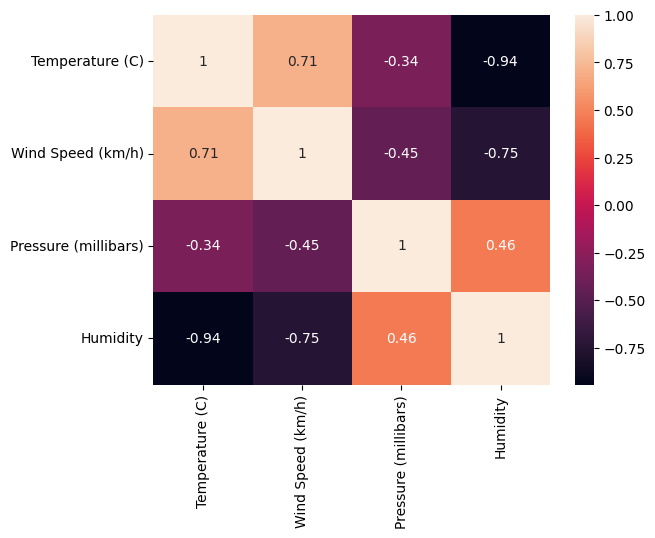

In [8]:
correlation=df.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)
plt.show()

In [9]:
print(df.std(numeric_only=True))

Temperature (C)         4.408296
Wind Speed (km/h)       6.066344
Pressure (millibars)    3.321718
Humidity                0.164565
dtype: float64


In [10]:
print(df.describe())

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)   Humidity
count        50.000000          50.000000             50.000000  50.000000
mean         13.409111          15.282120           1013.811000   0.661400
std           4.408296           6.066344              3.321718   0.164565
min           6.111111           3.928400           1007.260000   0.360000
25%           9.572222          11.161325           1011.635000   0.532500
50%          13.527778          14.312900           1014.505000   0.665000
75%          17.286111          19.955950           1016.350000   0.815000
max          21.183333          28.368200           1017.740000   0.950000


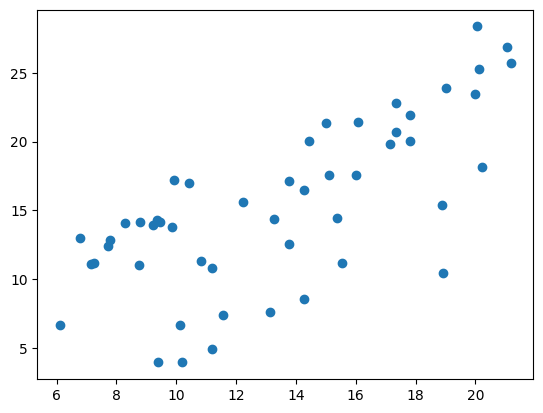

Index(['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)',
       'Humidity'],
      dtype='object')


In [11]:
x=df.iloc[:,:3].values
x=pd.DataFrame(x)
y=df["Humidity"]
plt.scatter(df["Temperature (C)"],df["Wind Speed (km/h)"])
plt.show()
print(df.columns)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train

,0,1,2
33,12.222222,15.6331,1014.25
35,17.355556,22.7815,1013.85
26,11.183333,10.8192,1008.71
34,15.094444,17.5490,1013.96
18,14.255556,8.5169,1015.82
7,8.772222,14.1519,1016.84
14,18.877778,15.3755,1017.17
45,15.022222,21.3808,1008.15
48,13.772222,17.0982,1007.36
29,6.788889,13.0088,1014.49


In [14]:
y_train

33    0.72
35    0.52
26    0.80
34    0.61
18    0.69
7     0.89
14    0.47
45    0.55
48    0.60
29    0.83
15    0.46
30    0.85
32    0.78
16    0.60
42    0.43
20    0.77
43    0.50
8     0.82
13    0.51
25    0.66
5     0.85
17    0.63
40    0.40
49    0.63
1     0.86
12    0.55
37    0.40
24    0.62
6     0.95
23    0.77
36    0.46
21    0.76
19    0.70
9     0.72
39    0.37
46    0.58
3     0.83
0     0.89
47    0.59
44    0.53
Name: Humidity, dtype: float64

In [15]:
x_test

,0,1,2
28,6.111111,6.6493,1014.45
11,17.144444,19.7869,1017.74
10,16.016667,17.5651,1017.42
41,20.216667,18.1125,1009.26
2,9.377778,3.9284,1015.94
27,7.155556,11.0768,1014.47
38,21.050000,26.9031,1011.44
31,7.800000,12.8156,1014.16
22,10.116667,6.6493,1015.40
4,8.755556,11.0446,1016.51


In [16]:
y_test

28    0.82
11    0.54
10    0.67
41    0.36
2     0.89
27    0.79
38    0.40
31    0.83
22    0.79
4     0.83
Name: Humidity, dtype: float64

In [17]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [18]:
y_pred=model.predict(x_test)

In [23]:
accuracy=r2_score(y_pred,y_test)*100
print(accuracy)

91.14279044298819


In [20]:
dic={"Temperature":20,"WindSpeed":14,"Pressure":1000}


In [21]:
new_data=pd.DataFrame({"Temperature":[20],"Wind Speed":[14],"Pressure":[1000]})

In [24]:
rt=model.predict(new_data)
print(rt)

[0.38168023]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
